# Lectura y preprocesamiento de datos

In [1]:
import pandas as pd
import datetime
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns', None) 

In [3]:
data = pd.read_excel("data.xlsb")
data["Fecha_Reporte"] = data["Fecha_Reporte"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))
data["Fecha_Ocurrencia"] = data["Fecha_Ocurrencia"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))
data["Fecha_Pago"] = data["Fecha_Pago"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))

In [4]:
aux = data
aux["Fecha_Reporte"] = aux.Fecha_Reporte.apply(lambda x: pd.Timestamp(x.year,x.month,1))
aux["Fecha_Ocurrencia"] = aux.Fecha_Ocurrencia.apply(lambda x: pd.Timestamp(x.year,x.month,1)) 
aux["Fecha_Pago"] = aux.Fecha_Pago.apply(lambda x : pd.Timestamp(x.year,x.month,1))
aux = aux.groupby(["Fecha_Ocurrencia","Fecha_Pago"])["Importe USD"].sum().reset_index()

In [5]:
data.shape

(4974, 6)

In [6]:
aux.shape

(1897, 3)

In [7]:
fecha_inicial_pago = aux["Fecha_Pago"].min()
fecha_final_pago = aux["Fecha_Pago"].max()
rango_fechas_pago = pd.date_range(fecha_inicial_pago, fecha_final_pago, freq="M")

fecha_inicial_ocurrencia = aux["Fecha_Ocurrencia"].min()
fecha_final_ocurrencia = aux["Fecha_Ocurrencia"].max()
rango_fechas_ocurrencia = pd.date_range(fecha_inicial_ocurrencia, fecha_final_ocurrencia, freq="M")

In [8]:
indice1 = pd.DataFrame({"Fecha_Pago" :pd.Series(rango_fechas_pago).apply(lambda x: pd.Timestamp(x.year,x.month,1))})
indice2 = pd.DataFrame({"Fecha_Ocurrencia" :pd.Series(rango_fechas_ocurrencia).apply(lambda x: pd.Timestamp(x.year,x.month,1))})
indice = indice2.merge(indice1, how = 'cross')
indice = indice[indice.Fecha_Pago > indice.Fecha_Ocurrencia]

In [9]:
aux.head()

,Fecha_Ocurrencia,Fecha_Pago,Importe USD
0,2008-09-01,2009-01-01,55.33
1,2008-09-01,2009-06-01,6.34
2,2008-09-01,2012-05-01,19.86
3,2008-11-01,2009-01-01,37.61
4,2008-11-01,2010-01-01,142.27


In [10]:
aux = aux.merge(indice, how = 'right').replace({np.nan : 0})
aux.shape

(14529, 3)

In [11]:
aux.head()

,Fecha_Ocurrencia,Fecha_Pago,Importe USD
0,2008-09-01,2009-01-01,55.33
1,2008-09-01,2009-02-01,0.00
2,2008-09-01,2009-03-01,0.00
3,2008-09-01,2009-04-01,0.00
4,2008-09-01,2009-05-01,0.00


In [12]:
X = aux[["Fecha_Ocurrencia","Fecha_Pago", "Importe USD"]]
y = aux[["Importe USD"]]

In [13]:
X["anno_pago"] = X["Fecha_Pago"].apply(lambda x : x.year)
X["Mes_pago"] = X["Fecha_Pago"].apply(lambda x : x.month)
X["anno_Oc"] = X["Fecha_Ocurrencia"].apply(lambda x : x.year)
X["Mes_Oc"] = X["Fecha_Ocurrencia"].apply(lambda x : x.month)

In [14]:
pd.pivot_table(X,values = ["Importe USD"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                        \
anno_pago        2009       2010       2011       2012       2013      2014   
anno_Oc                                                                       
2008           497.36     142.27        0.0      19.86        0.0       0.0   
2009          6622.28   20675.87    14682.1        0.0        0.0       0.0   
2010                   384653.83   851233.3    1763.73        0.0    236.74   
2011                              146324.97  250533.04   60288.44  77667.87   
2012                                         373085.24  247083.41  27333.18   
2013                                                    797239.82  602053.4   
2014                                                                93467.4   
2015                                                                          
2016                                                                          
2017                                                                          
2018                                                                          
2019                                                                          
2020                                                                          
2021                                                                          
2022                                                                          

                                                                       \
anno_pago       2015        2016         2017        2018        2019   
anno_Oc                                                                 
2008             0.0         0.0          0.0         0.0         0.0   
2009             0.0         0.0          0.0         0.0         0.0   
2010             0.0         0.0          0.0         0.0         0.0   
2011        93357.65         0.0          0.0         0.0         0.0   
2012         5147.57       99.79          0.0         0.0         0.0   
2013       486552.82     5337.53      2492.31         0.0     6593.62   
2014        135145.1     2767.82       479.72      586.28         0.0   
2015       298261.79  1747868.02      26900.2  1000222.32      2195.3   
2016                  3175482.19    2093204.0   147955.72      2145.1   
2017                              16389618.18  7218313.35   860750.24   
2018                                           1014029.34  1654157.06   
2019                                                       4457123.83   
2020                                                                    
2021                                                                    
2022                                                                    

                                              
anno_pago        2020       2021        2022  
anno_Oc                                       
2008              0.0        0.0        0.00  
2009              0.0        0.0        0.00  
2010              0.0        0.0        0.00  
2011              0.0    10167.2        0.00  
2012              0.0        0.0        0.00  
2013              0.0    3946.54        0.00  
2014              0.0    4203.89        0.00  
2015            268.1    9613.03        0.00  
2016           620.06    2754.95     1208.91  
2017        364879.07   182544.9      637.73  
2018        706926.41  203696.81   885306.10  
2019       4327219.58  516082.01   112861.48  
2020        374421.41  621776.42   126324.94  
2021                    581153.2  1058429.37  
2022                               688171.05

In [15]:
pd.pivot_table(X ,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                 \
anno_pago             2009                                                  
Mes_pago                1       2       3    4    5       6       7    8    
anno_Oc Mes_Oc                                                              
2008    9            55.33     0.0     0.0  0.0  0.0    6.34     0.0  0.0   
        10             0.0     0.0     0.0  0.0  0.0     0.0     0.0  0.0   
        11           37.61     0.0     0.0  0.0  0.0     0.0     0.0  0.0   
        12             0.0  398.08     0.0  0.0  0.0     0.0     0.0  0.0   
2009    1                   946.67  737.46  0.0  0.0     0.0     0.0  0.0   
        2                              0.0  0.0  0.0     0.0     0.0  0.0   
        3                                   0.0  0.0     0.0  206.98  0.0   
        4                                        0.0     0.0     0.0  0.0   
        5                                             110.22   70.65  0.0   
        6                                                        0.0  0.0   
        7                                                             0.0   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2010    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2011    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2012    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9  

In [16]:
X["Mes_pago_sin"] = X["Mes_pago"].apply(lambda x : np.sin(2*np.pi*x/12))
X["Mes_pago_cos"] = X["Mes_pago"].apply(lambda x : np.cos(2*np.pi*x/12))

X["Mes_Oc_sin"] = X["Mes_Oc"].apply(lambda x : np.sin(2*np.pi*x/12))
X["Mes_Oc_cos"] = X["Mes_Oc"].apply(lambda x : np.cos(2*np.pi*x/12))

In [17]:
#El año lo estandarizamos, pero comenzando desde 0.
ap_min = X.anno_pago.min() ; ap_max = X.anno_pago.max() 
ao_min = X.anno_Oc.min() ; ao_max = X.anno_Oc.max()

X["anno_pago"] = (X["anno_pago"] - ap_min) / (ap_max - ap_min)

X["anno_Oc"] = (X["anno_Oc"] - ao_min) / (ao_max - ao_min)

In [18]:
columns = ["anno_pago", "anno_Oc", "Mes_pago_sin", "Mes_pago_cos", "Mes_Oc_sin", "Mes_Oc_cos", "Importe USD"]
# columns = ["anno", "Mes_sin", "Mes_cos"]   #, "Importe USD"]

In [19]:
#Normalizamos los valores de y
y_mean = y.values.mean()
y_std = y.values.std()
y = (y - y_mean) / y_std
X["Importe USD"] = (X["Importe USD"] - y_mean) / y_std

In [20]:
d_cols = ["Fecha_Ocurrencia", "Fecha_Pago", "Importe USD", "anno_pago", "Mes_pago", "anno_Oc", "Mes_Oc"]

In [21]:
#Creamos el X_train e y_train utilizando secuencias de un largo fijo
sequence_length = 30
X_train = []
y_train = []
X_test = []
y_test = []
D_test = []
D_train = []

for i in range(sequence_length, len(X)):
    if ( (X.Fecha_Pago[i] > pd.Timestamp(2021,11,10)) | (X.Fecha_Ocurrencia[i].year == 2022)):
        X_test.append(X.iloc[i - sequence_length : i][columns].values)
        y_test.append(y.iloc[i])
        D_test.append(X.iloc[i][d_cols].values)
    else:
        X_train.append(X.iloc[i - sequence_length : i][columns].values)
        y_train.append(y.iloc[i])
        D_train.append(X.iloc[i][d_cols].values)

    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

D_test = pd.DataFrame(D_test, columns = d_cols)
D_test["Importe USD"] = D_test["Importe USD"].apply(lambda x: x*y_std + y_mean)
D_test["anno_pago"] = D_test.anno_pago.apply(lambda x: x*(ap_max-ap_min) + ap_min)
D_test["anno_Oc"] = D_test.anno_Oc.apply(lambda x: x*(ao_max-ao_min) + ao_min)

D_train = pd.DataFrame(D_train, columns = d_cols)
D_train["Importe USD"] = D_train["Importe USD"].apply(lambda x: x*y_std + y_mean)
D_train["anno_pago"] = D_train.anno_pago.apply(lambda x: x*(ap_max-ap_min) + ap_min)
D_train["anno_Oc"] = D_train.anno_Oc.apply(lambda x: x*(ao_max-ao_min) + ao_min)

In [22]:
X_train.shape, y_train.shape

((12525, 30, 7), (12525, 1))

In [23]:
X_test.shape, y_test.shape

((1974, 30, 7), (1974, 1))

In [24]:
n_steps = 30
n_features = 7

# LSTM + DROPOUT

In [25]:
def lstm_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(n_lstm,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),        
    )

    return model

BEST LOSS: 0.09075425565242767
 BEST VAL LOSS : 0.3612339198589325


Text(0.5, 1.0, 'val_loss vs iteration')

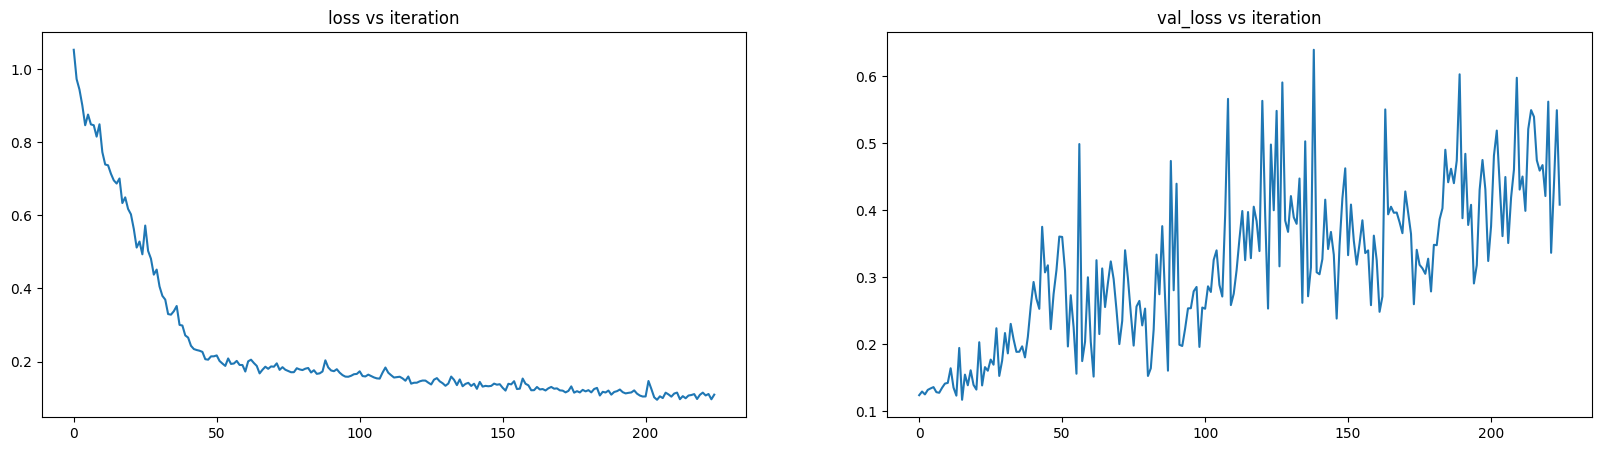

In [26]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(10):
    print(f"iteration actual: {i+1}\n")
    
    model = lstm_dropout_model(sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 20, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")
    print(f"Iteration {i+1} - Loss: {loss}\n val loss: {val_loss} \n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [27]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
4,0.090754,0.361234
9,0.106602,0.269361
8,0.146293,0.257713
3,0.146646,0.388502
2,0.187936,0.674005
7,0.189321,0.175150
1,0.471271,0.133745
6,0.550876,0.375410
0,0.750200,0.174043


In [28]:
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               69632     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [29]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 7ms/step


In [30]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred              
anno_pago      2021.0      2022.0        2021.0        2022.0
anno_Oc                                                      
2008.0            0.0        0.00   1553.919434 -7.649430e+03
2009.0            0.0        0.00   1048.948486 -5.382212e+04
2010.0            0.0        0.00   1938.322021 -4.727593e+04
2011.0            0.0        0.00   3605.707031 -3.985825e+04
2012.0            0.0        0.00   8100.827148 -2.842646e+04
2013.0        1152.31        0.00  17212.441406 -5.239306e+03
2014.0          72.16        0.00  34174.914062  4.078304e+04
2015.0            0.0        0.00  63814.144531  1.094218e+05
2016.0            0.0     1208.91      115533.0  1.782860e+05
2017.0         107.26      637.73  175918.09375  2.162321e+05
2018.0         481.48   885306.10   164957.6875  2.068546e+06
2019.0       26372.82   112861.48  261409.15625  8.131638e+05
2020.0       32119.25   126324.94  295957.34375  3.790911e+05
2021.0        81829.5  1058429.37  202272.65625  1.975170e+06
2022.0                  688171.05                1.774396e+06

In [31]:
# pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [32]:
# pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [33]:
best_model.save("LSTM_v2_{best_loss}_{best_val_loss}.h5")

# GRU + DROPOUT

In [35]:
def gru_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(n_lstm,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
        #metrics = ['accuracy',]
    )

    return model

BEST LOSS: 0.10870663821697235
 BEST VAL LOSS : 0.33566758036613464


Text(0.5, 1.0, 'val_loss vs iteration')

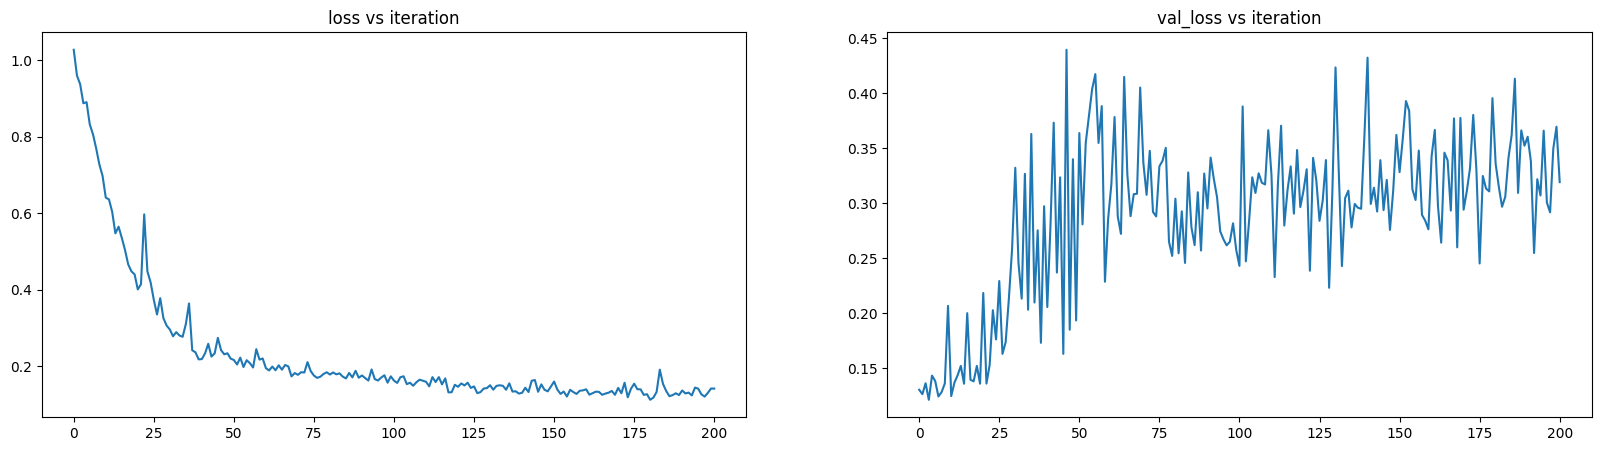

In [36]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(10):
    print(f"iteration actual: {i+1}\n")
    
    model = gru_dropout_model(sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 20, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")
    print(f"Iteration {i+1} - Loss: {loss} \n val loss: {val_loss}\n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [37]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
9,0.108707,0.335668
3,0.127294,0.234279
8,0.133924,0.183306
4,0.141783,0.320136
2,0.180007,0.168574
7,0.225813,0.167181
6,0.405934,0.129431
1,0.709343,0.121018
0,0.753811,0.118572


best_plot

In [38]:
best_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 128)               52608     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 52,737
Trainable params: 52,737
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 6ms/step


In [40]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred              
anno_pago      2021.0      2022.0        2021.0        2022.0
anno_Oc                                                      
2008.0            0.0        0.00   -237.975098 -6.475470e+04
2009.0            0.0        0.00  20910.734375  1.525977e+05
2010.0            0.0        0.00  23184.652344  1.775525e+05
2011.0            0.0        0.00  26614.460938  2.059133e+05
2012.0            0.0        0.00  33612.324219  2.356772e+05
2013.0        1152.31        0.00  42785.265625  2.704175e+05
2014.0          72.16        0.00  55260.421875  3.116965e+05
2015.0            0.0        0.00  70967.164062  3.616692e+05
2016.0            0.0     1208.91  90034.578125  4.195894e+05
2017.0         107.26      637.73  94574.992188  4.593234e+05
2018.0         481.48   885306.10  104056.03125  2.378374e+06
2019.0       26372.82   112861.48  167592.09375  1.174186e+06
2020.0       32119.25   126324.94  159566.34375  6.395334e+05
2021.0        81829.5  1058429.37    231118.625  1.303609e+06
2022.0                  688171.05                2.383288e+06

In [41]:
# pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [42]:
# pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [43]:
best_model.save("GRU_v2_{best_loss}_{best_val_loss}.h5")

# SIMPLE-RNN + GRU + DROPOUT

In [44]:
def simpleRNN_gru_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(64, return_sequences = True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(64,input_shape=(n_steps, n_features), return_sequences = True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.GRU(64,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
        #metrics = ['accuracy',]
    )

    return model

BEST LOSS: 0.22178184986114502
 BEST VAL LOSS : 0.12892548739910126


Text(0.5, 1.0, 'val_loss vs iteration')

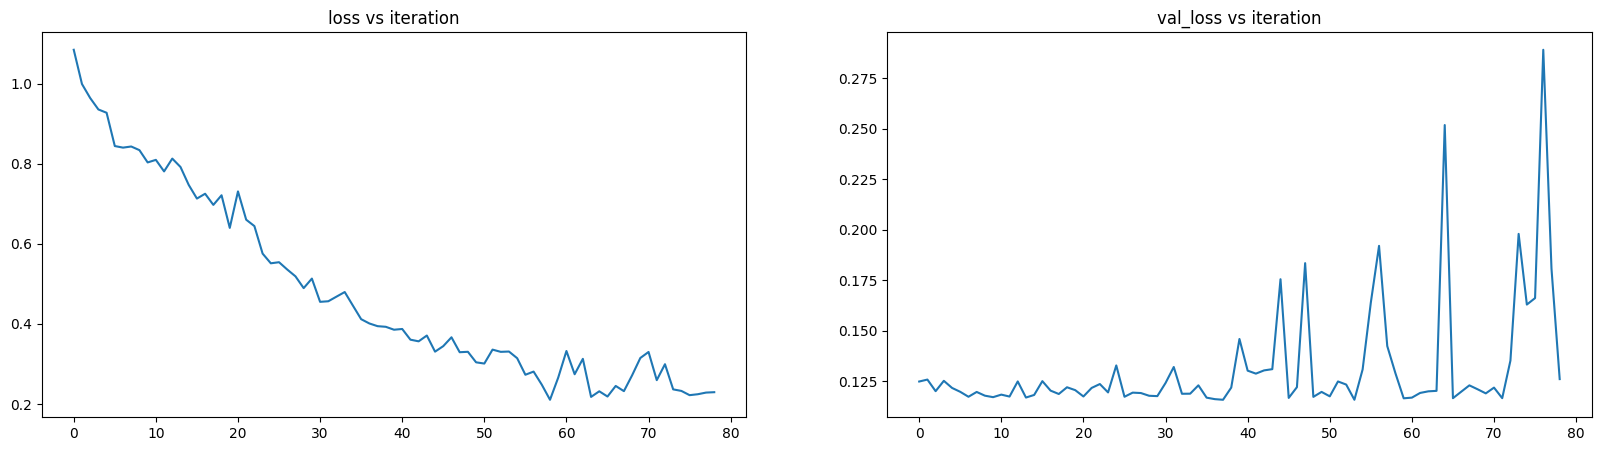

In [45]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(5):
    print(f"iteration actual: {i+1}\n")
    
    model = simpleRNN_gru_dropout_model(64) #sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 20, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")
    print(f"Iteration {i+1} - Loss: {loss} \n val loss: {val_loss}\n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [46]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
2,0.221782,0.128925
1,0.248941,0.116720
0,0.311580,0.127385
3,0.319113,0.118575
4,0.439846,0.118433


In [47]:
best_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30, 64)            4608      
                                                                 
 dropout_26 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_12 (LSTM)              (None, 30, 64)            33024     
                                                                 
 dropout_27 (Dropout)        (None, 30, 64)            0         
                                                                 
 gru_12 (GRU)                (None, 64)                24960     
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 1)               

In [48]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 10ms/step


In [49]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred              
anno_pago      2021.0      2022.0        2021.0        2022.0
anno_Oc                                                      
2008.0            0.0        0.00  13324.238281  1.228650e+05
2009.0            0.0        0.00  46636.347656  3.811068e+05
2010.0            0.0        0.00  48418.964844  3.928940e+05
2011.0            0.0        0.00  50267.972656  4.059649e+05
2012.0            0.0        0.00  52355.847656  4.201632e+05
2013.0        1152.31        0.00  54508.070312  4.357276e+05
2014.0          72.16        0.00  56776.996094  4.525903e+05
2015.0            0.0        0.00  59162.855469  4.707721e+05
2016.0            0.0     1208.91  61689.882812  4.902432e+05
2017.0         107.26      637.73  63869.457031  5.143296e+05
2018.0         481.48   885306.10  66980.421875  1.219635e+06
2019.0       26372.82   112861.48       75459.5  5.708188e+05
2020.0       32119.25   126324.94   73712.53125  5.930785e+05
2021.0        81829.5  1058429.37     75003.125  6.576271e+05
2022.0                  688171.05                4.588050e+05

In [50]:
# pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [51]:
# pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [52]:
best_model.save("simpleRNN_GRU_v2_{best_loss}_{best_val_loss}.h5")

# 



# SimpleRNNx2

In [53]:
def simpleRNNx2():

    inputs = tf.keras.layers.Input(shape=(n_steps, n_features))

    #This is going to be a RNN simple cell

    x = tf.keras.layers.SimpleRNN(64, return_sequences=True)(inputs)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.SimpleRNN(32)(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
    )

    return model

BEST LOSS: 0.32655492424964905
 BEST VAL LOSS : 0.11728046834468842


Text(0.5, 1.0, 'val_loss vs iteration')

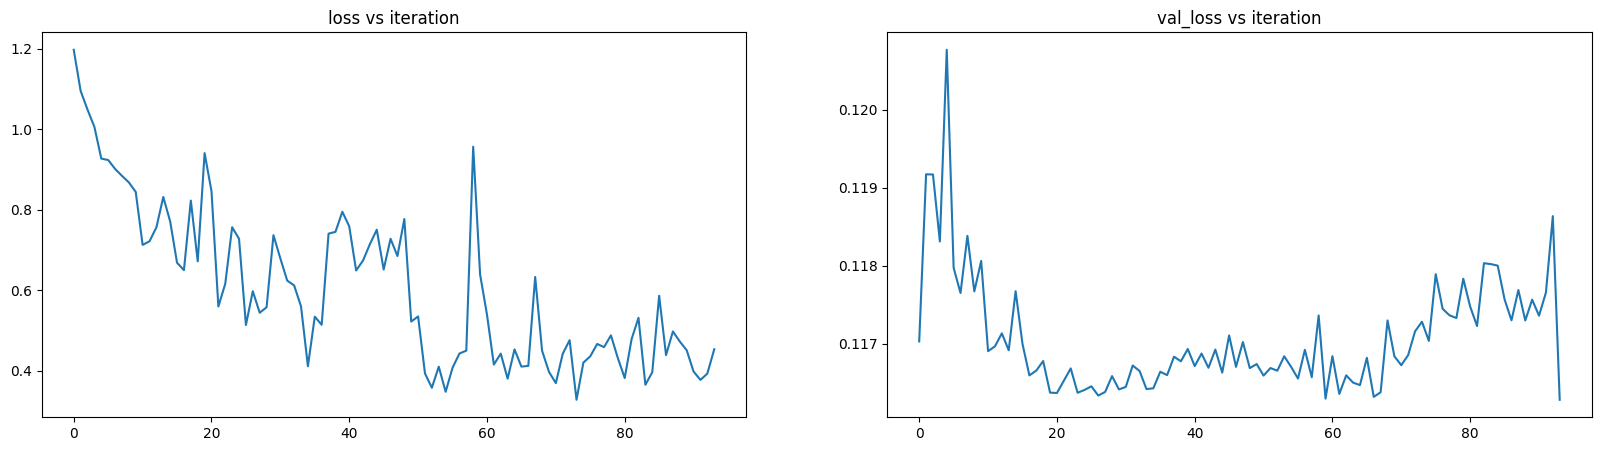

In [54]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(5):
    print(f"iteration actual: {i+1}\n")
    
    model = simpleRNNx2()
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 20, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}")
    print(f"BEST VAL LOSS: {best_val_loss}")
    print(f"Iteration {i+1} - Loss: {loss}  \n val_loss : {val_loss} \n ")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"]); p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"]); p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}\n BEST VAL LOSS : {best_val_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]); ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"]); ax2.set_title("val_loss vs iteration")

In [55]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
1,0.326555,0.117280
4,0.351459,0.116536
3,0.360342,0.116377
0,0.362144,0.116397
2,0.365226,0.116545


In [56]:
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 7)]           0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 30, 64)            4608      
                                                                 
 dropout_38 (Dropout)        (None, 30, 64)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0   

In [57]:
best_model.save("simpleRNNx2_v2_{best_loss}_{best_val_loss}.h5")

In [58]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 0s 3ms/step


In [59]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred               
anno_pago      2021.0      2022.0        2021.0         2022.0
anno_Oc                                                       
2008.0            0.0        0.00  11885.142578  130736.570312
2009.0            0.0        0.00  35655.429688  392209.718750
2010.0            0.0        0.00  35655.429688  392209.718750
2011.0            0.0        0.00  35655.429688  392209.718750
2012.0            0.0        0.00  35655.429688  392209.718750
2013.0        1152.31        0.00  35655.429688  392209.718750
2014.0          72.16        0.00  35655.429688  392209.718750
2015.0            0.0        0.00  35655.429688  392209.718750
2016.0            0.0     1208.91  35655.429688  392209.718750
2017.0         107.26      637.73  35655.429688  392209.718750
2018.0         481.48   885306.10  35655.429688  460484.000000
2019.0       26372.82   112861.48  35655.429688  392209.718750
2020.0       32119.25   126324.94  35655.429688  392209.718750
2021.0        81829.5  1058429.37  32684.142578  427339.312500
2022.0                  688171.05                163420.703125

In [60]:
# pd.pivot_table(D_test ,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [61]:
# pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")